In [27]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file_path = '../data/raw/synthetic.csv'

In [3]:
df = pd.read_csv(data_file_path, usecols=['Feedback'], nrows=10000)

In [10]:
df.value_counts()

Feedback                                                        
Very happy with the final product, but the timeline was delayed.    4057
The process was smooth but some issues with the kitchen.            3057
The home is fantastic, I love the upgrades!                         1934
Had a terrible experience with the customer service.                 952
Name: count, dtype: int64

In [13]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

In [15]:
df['cleaned_feedback'] = df['Feedback'].apply(preprocess_text)



,Feedback,cleaned_feedback
0,"Very happy with the final product, but the tim...",happy final product timeline delayed
1,"Very happy with the final product, but the tim...",happy final product timeline delayed
2,The process was smooth but some issues with th...,process smooth issues kitchen
3,The process was smooth but some issues with th...,process smooth issues kitchen
4,"Very happy with the final product, but the tim...",happy final product timeline delayed
...,...,...
9995,The process was smooth but some issues with th...,process smooth issues kitchen
9996,"The home is fantastic, I love the upgrades!",home fantastic love upgrades
9997,"Very happy with the final product, but the tim...",happy final product timeline delayed
9998,"The home is fantastic, I love the upgrades!",home fantastic love upgrades


In [16]:
df.head()

,Feedback,cleaned_feedback
0,"Very happy with the final product, but the tim...",happy final product timeline delayed
1,"Very happy with the final product, but the tim...",happy final product timeline delayed
2,The process was smooth but some issues with th...,process smooth issues kitchen
3,The process was smooth but some issues with th...,process smooth issues kitchen
4,"Very happy with the final product, but the tim...",happy final product timeline delayed


In [18]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...


True

In [19]:
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

In [20]:
df['sentiment_score'] = df['Feedback'].apply(get_sentiment_score)


In [21]:
df.head()

,Feedback,cleaned_feedback,sentiment_score
0,"Very happy with the final product, but the tim...",happy final product timeline delayed,0.0378
1,"Very happy with the final product, but the tim...",happy final product timeline delayed,0.0378
2,The process was smooth but some issues with th...,process smooth issues kitchen,0.0000
3,The process was smooth but some issues with th...,process smooth issues kitchen,0.0000
4,"Very happy with the final product, but the tim...",happy final product timeline delayed,0.0378


In [22]:
average_sentiment = np.mean(df['sentiment_score'])
print(f"Average sentiment score: {average_sentiment}")

Average sentiment score: 0.13316388


In [23]:
df['sentiment_score'].describe()

count    10000.000000
mean         0.133164
std          0.377131
min         -0.476700
25%          0.000000
50%          0.037800
75%          0.037800
max          0.843900
Name: sentiment_score, dtype: float64

In [24]:
sample = df[['Feedback', 'sentiment_score']].sample(20)
print(sample)

                                               Feedback  sentiment_score
1415        The home is fantastic, I love the upgrades!           0.8439
4347  Had a terrible experience with the customer se...          -0.4767
9917  The process was smooth but some issues with th...           0.0000
8676        The home is fantastic, I love the upgrades!           0.8439
3278  Very happy with the final product, but the tim...           0.0378
834   The process was smooth but some issues with th...           0.0000
561   Very happy with the final product, but the tim...           0.0378
1863  Very happy with the final product, but the tim...           0.0378
479   Very happy with the final product, but the tim...           0.0378
8173  The process was smooth but some issues with th...           0.0000
2639        The home is fantastic, I love the upgrades!           0.8439
8086  The process was smooth but some issues with th...           0.0000
30    Very happy with the final product, but the ti

In [25]:
df[['Feedback', 'sentiment_score']].sample(10)

,Feedback,sentiment_score
3972,The process was smooth but some issues with th...,0.0000
7716,The process was smooth but some issues with th...,0.0000
4117,The process was smooth but some issues with th...,0.0000
1421,"The home is fantastic, I love the upgrades!",0.8439
1102,Had a terrible experience with the customer se...,-0.4767
8164,The process was smooth but some issues with th...,0.0000
874,The process was smooth but some issues with th...,0.0000
4480,"Very happy with the final product, but the tim...",0.0378
1292,The process was smooth but some issues with th...,0.0000
2359,The process was smooth but some issues with th...,0.0000


In [26]:
df['sentiment_score'].describe()

count    10000.000000
mean         0.133164
std          0.377131
min         -0.476700
25%          0.000000
50%          0.037800
75%          0.037800
max          0.843900
Name: sentiment_score, dtype: float64

<Axes: >

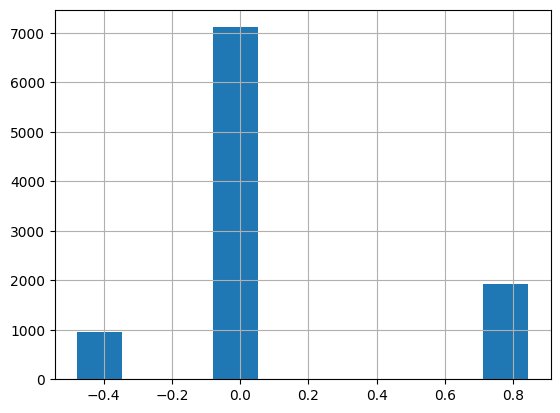

In [28]:
df['sentiment_score'].hist()

In [32]:
get_sentiment_score("Very happy with the final product, but the timeline was delayed")

0

In [35]:
# Testing complete - using full data set now.
df = pd.read_csv(data_file_path)

                                                 Feedback  \
29804         The home is fantastic, I love the upgrades!   
123037        The home is fantastic, I love the upgrades!   
61089   Very happy with the final product, but the tim...   
208254  Very happy with the final product, but the tim...   
244938  The process was smooth but some issues with th...   
207726  Very happy with the final product, but the tim...   
160470        The home is fantastic, I love the upgrades!   
51871   Had a terrible experience with the customer se...   
73928         The home is fantastic, I love the upgrades!   
25755   Had a terrible experience with the customer se...   

        refined_sentiment_score  final_sentiment_score  
29804                    0.7424               0.742400  
123037                   0.7424               0.742400  
61089                   -0.1163              -0.145375  
208254                  -0.1163              -0.145375  
244938                   0.1280            

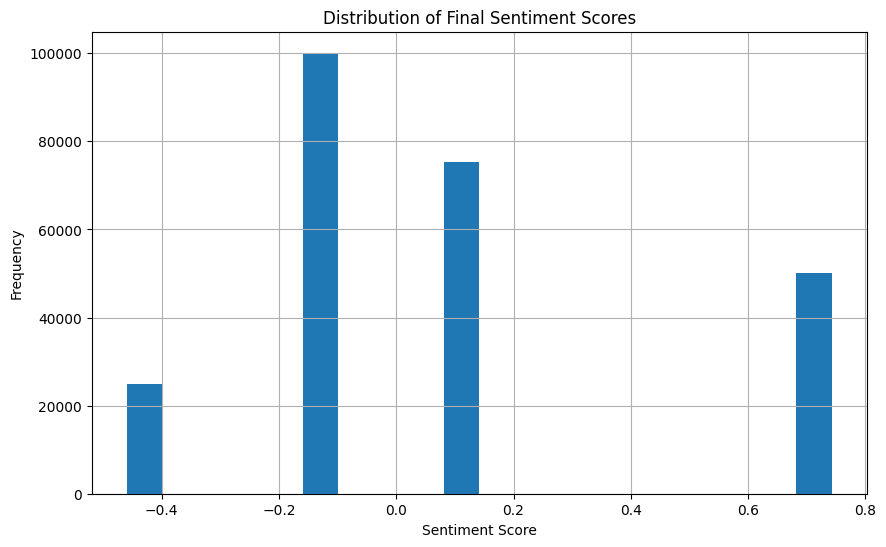

Refined neutral scores: 0
Refined score range: -0.4588 to 0.7424

Sentence: Very happy with the final product, but the timeline was delayed
Initial score: -0.1163
Final score: -0.145375

Sentence: The process was smooth but some issues with the kitchen
Initial score: 0.128
Final score: 0.096

Sentence: The home is fantastic, I love the upgrades!
Initial score: 0.7424
Final score: 0.7424

Sentence: Had a terrible experience with the customer service
Initial score: -0.4588
Final score: -0.4588


In [36]:
nltk.download('vader_lexicon', quiet=True)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Add custom lexicon
custom_lexicon = {
    'upgrade': 2.0,
    'spacious': 1.5,
    'delay': -1.5,
    'issue': -1.0,
    'smooth': 1.0,
    'fantastic': 2.0,
    'terrible': -2.0,
    'happy': 1.5,
    'love': 2.0,
}
sia.lexicon.update(custom_lexicon)

def get_sentiment_score(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

def adjust_mixed_sentiment(text, score):
    if "but" in text.lower() or "however" in text.lower():
        # Reduce the absolute value of the score for mixed sentiments
        return score * 0.75 if score > 0 else score * 1.25
    return score

# Apply refined sentiment analysis
df['refined_sentiment_score'] = df['Feedback'].apply(get_sentiment_score)
df['final_sentiment_score'] = df.apply(lambda row: adjust_mixed_sentiment(row['Feedback'], row['refined_sentiment_score']), axis=1)

# Display results
print(df[['Feedback', 'refined_sentiment_score', 'final_sentiment_score']].sample(10))

# Calculate and display statistics
print("\nRefined Sentiment Score Statistics:")
print(df['refined_sentiment_score'].describe())

print("\nFinal Sentiment Score Statistics:")
print(df['final_sentiment_score'].describe())


plt.figure(figsize=(10, 6))
df['final_sentiment_score'].hist(bins=20)
plt.title('Distribution of Final Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

print(f"Refined neutral scores: {(df['final_sentiment_score'] == 0).sum()}")

print(f"Refined score range: {df['final_sentiment_score'].min()} to {df['final_sentiment_score'].max()}")

# Test on specific examples
test_sentences = [
    "Very happy with the final product, but the timeline was delayed",
    "The process was smooth but some issues with the kitchen",
    "The home is fantastic, I love the upgrades!",
    "Had a terrible experience with the customer service"
]

for sentence in test_sentences:
    score = get_sentiment_score(sentence)
    final_score = adjust_mixed_sentiment(sentence, score)
    print(f"\nSentence: {sentence}")
    print(f"Initial score: {score}")
    print(f"Final score: {final_score}")

In [37]:
df.head()

,City,Zipcode,Marital_Status,Family_Size,Credit_Score,Current_Residence,Annual_Income,DTI,Location,Square_Footage,...,Loan_Term,Feedback,Inflation_Rate,Unemployment_Rate,Current_Market_Interest_Rate,Year_Closed,Median_Price_of_Nearby_Homes,Sentiment_Score,refined_sentiment_score,final_sentiment_score
0,Dallas,52837,Married,4,471,Own,31887.745006,0.328359,Urban,635.573453,...,19,"Very happy with the final product, but the tim...",8.128591,8.134932,7.874486,2020,288647,0.5,-0.1163,-0.145375
1,Josephine,45664,Unmarried,3,724,Own,65232.219782,0.537171,Suburban,1489.058748,...,15,"Very happy with the final product, but the tim...",6.559587,3.071274,2.240142,2021,321436,0.5,-0.1163,-0.145375
2,Little Elm,17451,Unmarried,1,762,Rent,159888.836069,0.105950,Suburban,2797.489668,...,30,The process was smooth but some issues with th...,0.005665,3.462208,3.308767,2020,490369,0.4,0.1280,0.096000
3,Aubrey,32232,Married,3,843,Own,180134.006893,0.218590,Suburban,3512.923786,...,29,The process was smooth but some issues with th...,0.005665,3.691785,2.712408,2020,206882,0.4,0.1280,0.096000
4,Frisco,35764,Married,2,782,Own,113806.317489,0.207404,Rural,2411.702711,...,30,"Very happy with the final product, but the tim...",6.993261,4.473198,4.475365,2021,899601,0.5,-0.1163,-0.145375


In [38]:
df.drop(columns=['refined_sentiment_score', 'Sentiment_Score']).to_csv('../data/processed/processed_synthetic.csv',index=False)